<a href="https://colab.research.google.com/github/Zibraan/My_DataScience_Codes/blob/main/phone_price_b_decision_tree_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv(r"C:\Users\Zibraan\Downloads\PRCP-1009-CellphonePrice\Data\datasets_11167_15520_train.csv")

In [ ]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data.shape

(2000, 21)

In [ ]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
data.head(pd.set_option('display.max_columns',None))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
data.battery_power.value_counts()

1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64

In [ ]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


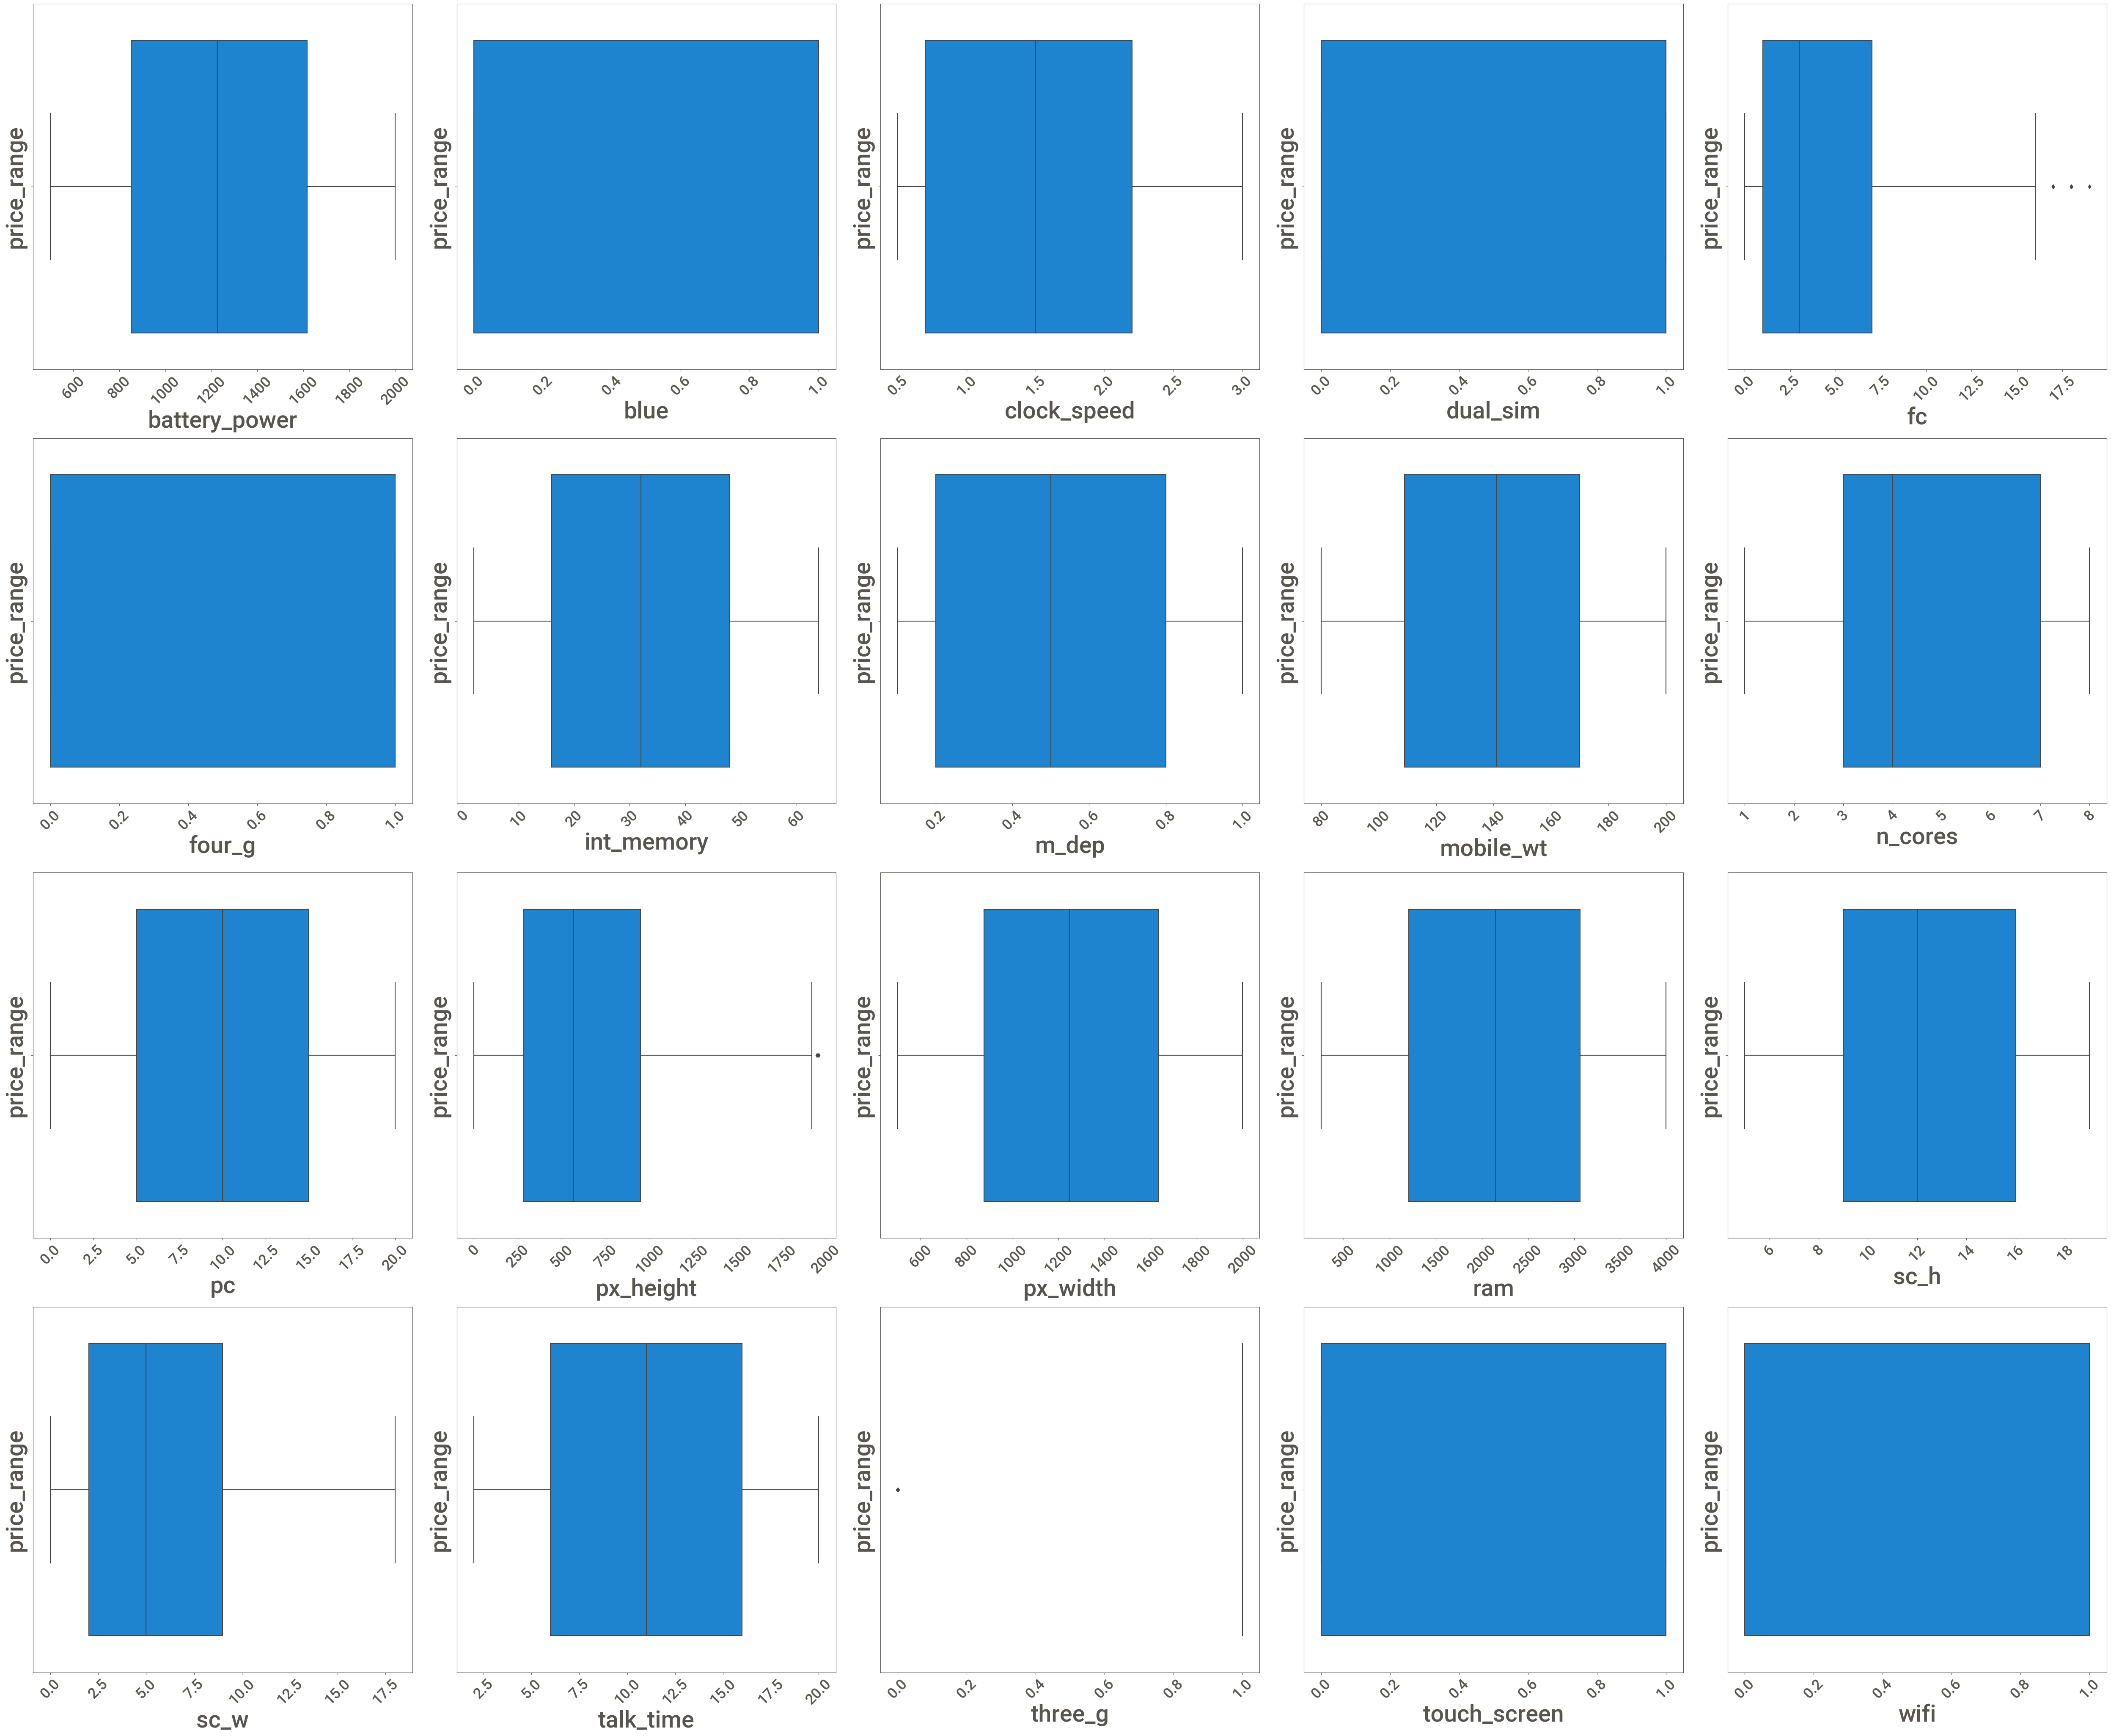

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(50, 50), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=20 :
        ax = plt.subplot(5, 5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=40)
        plt.ylabel('price_range',fontsize=40)
        plt.xticks(fontsize=25, rotation=45)
    plotnumber+=1
plt.tight_layout()

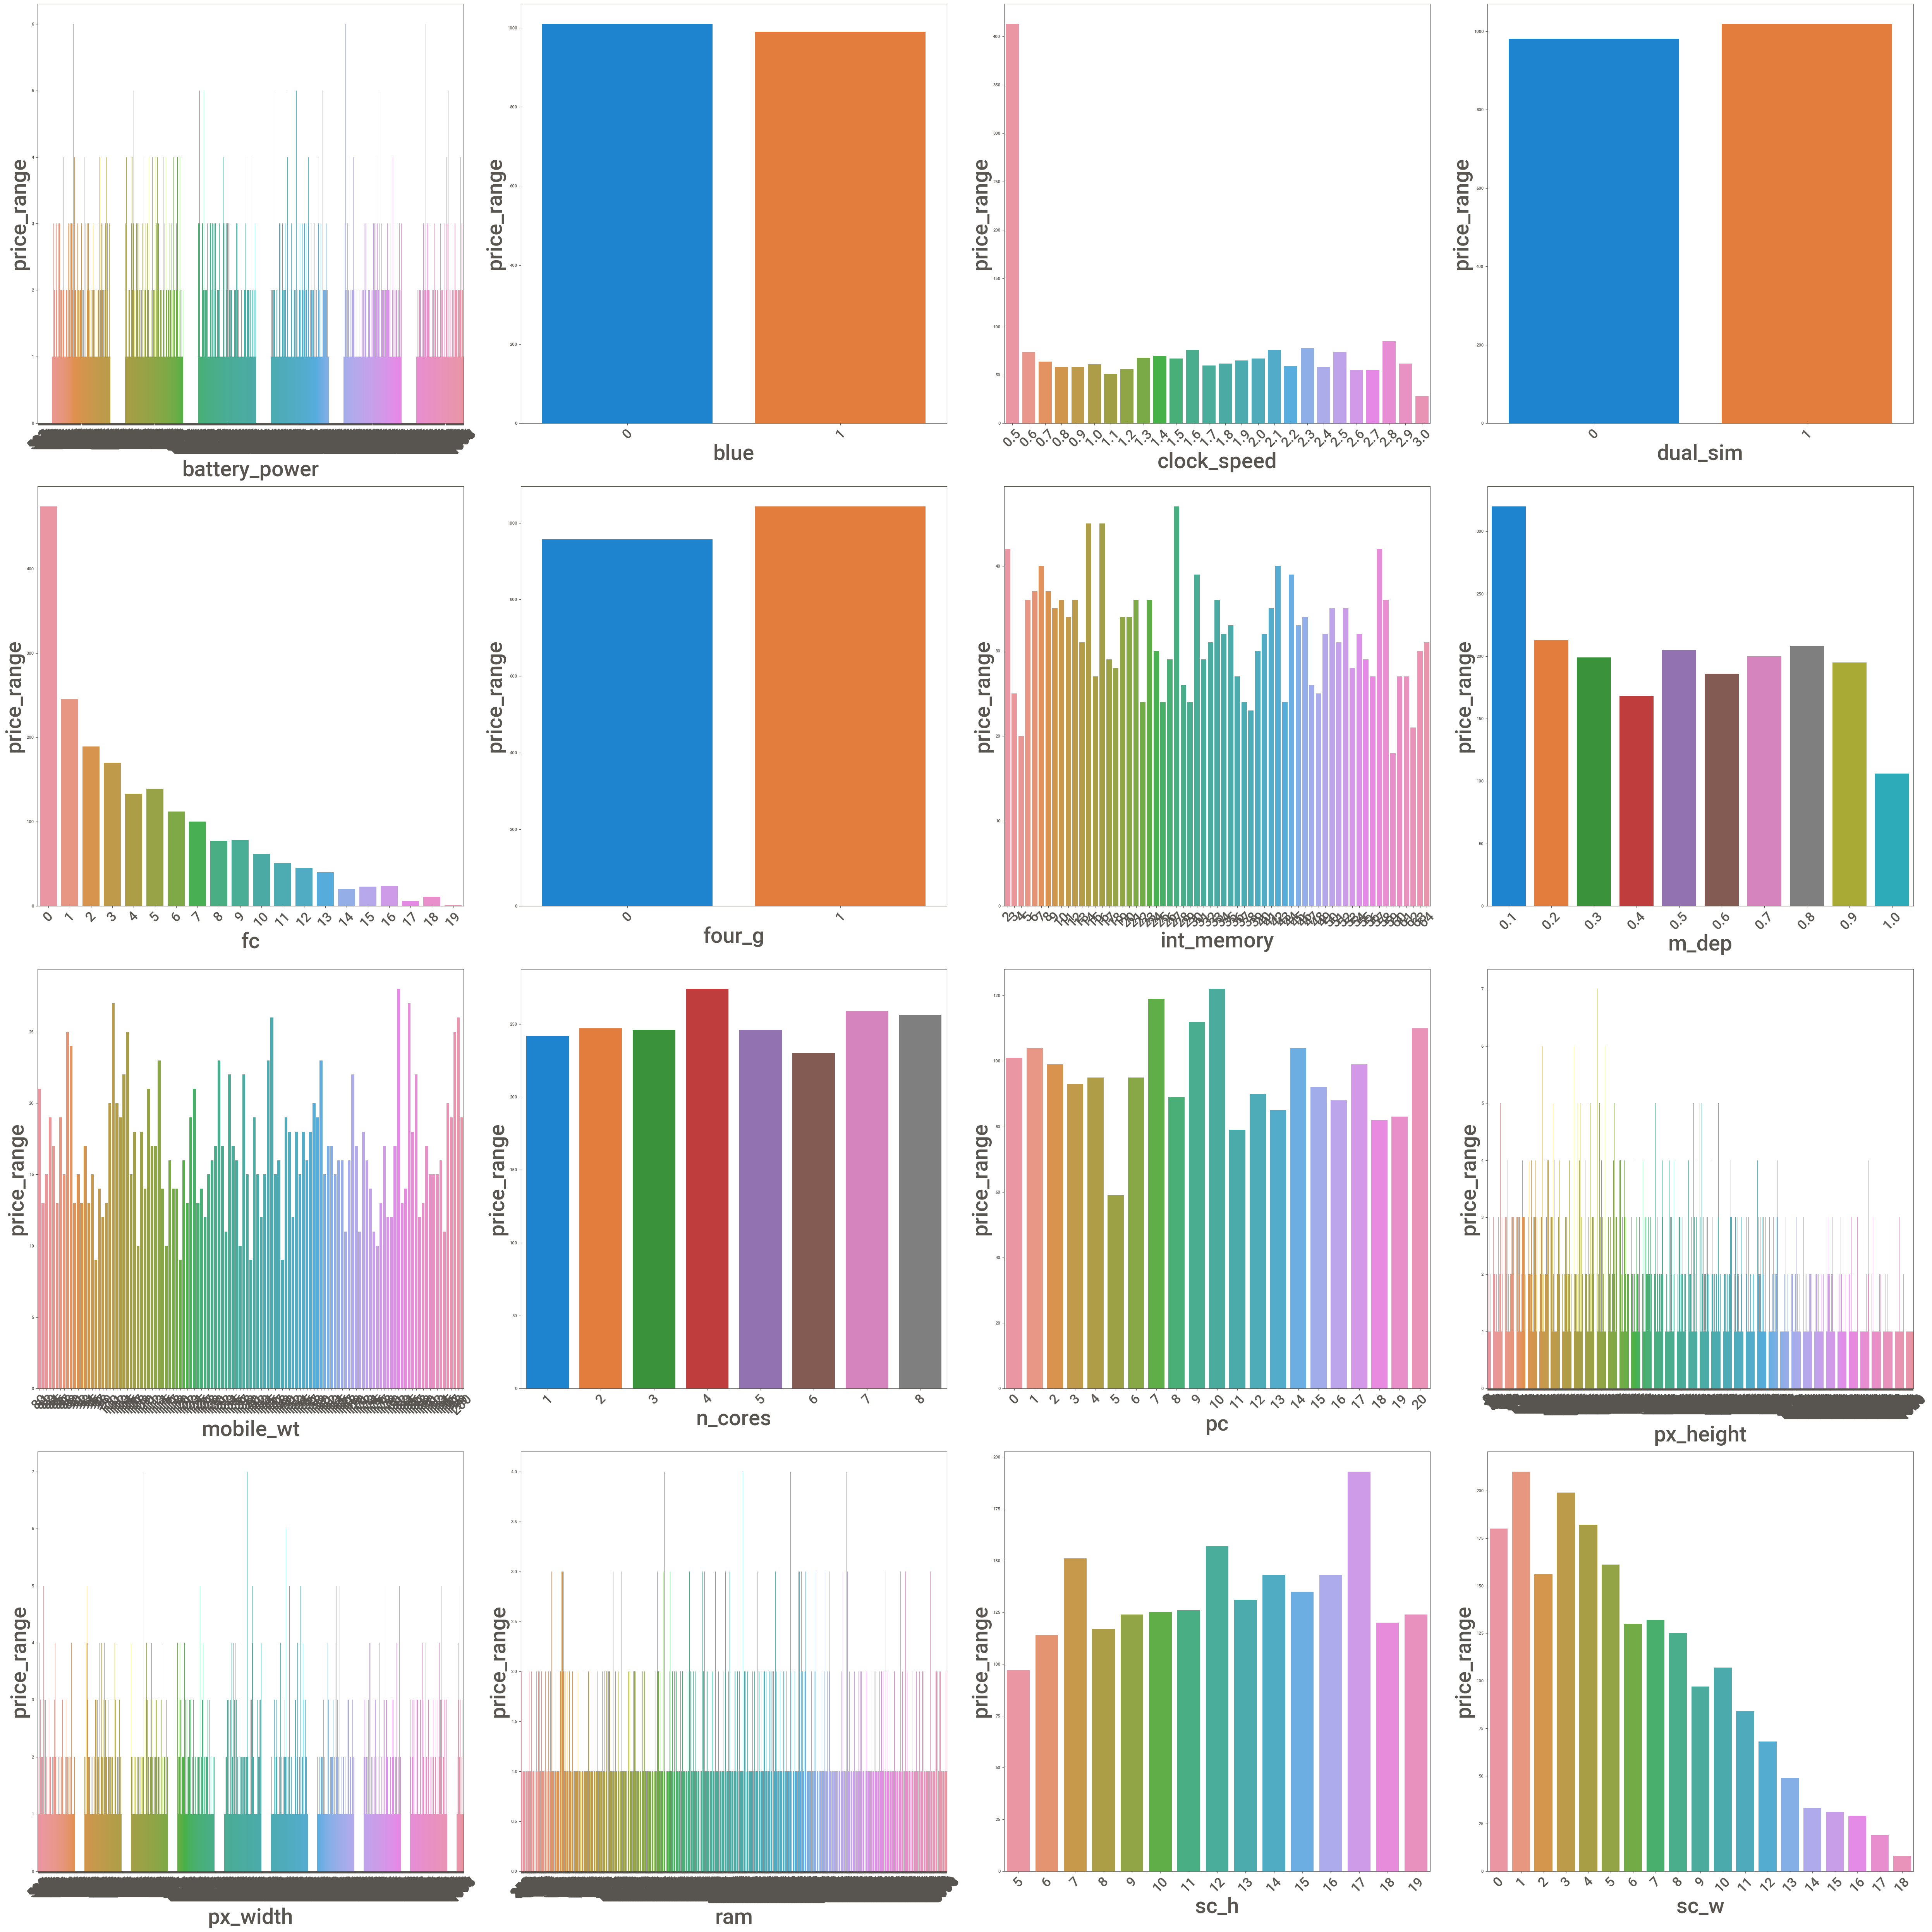

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(50, 50), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4, 4,plotnumber)
        sns.countplot(data[column])
        plt.xlabel(column,fontsize=40)
        plt.ylabel('price_range',fontsize=40)
        plt.xticks(fontsize=25, rotation=45)
    plotnumber+=1
plt.tight_layout()

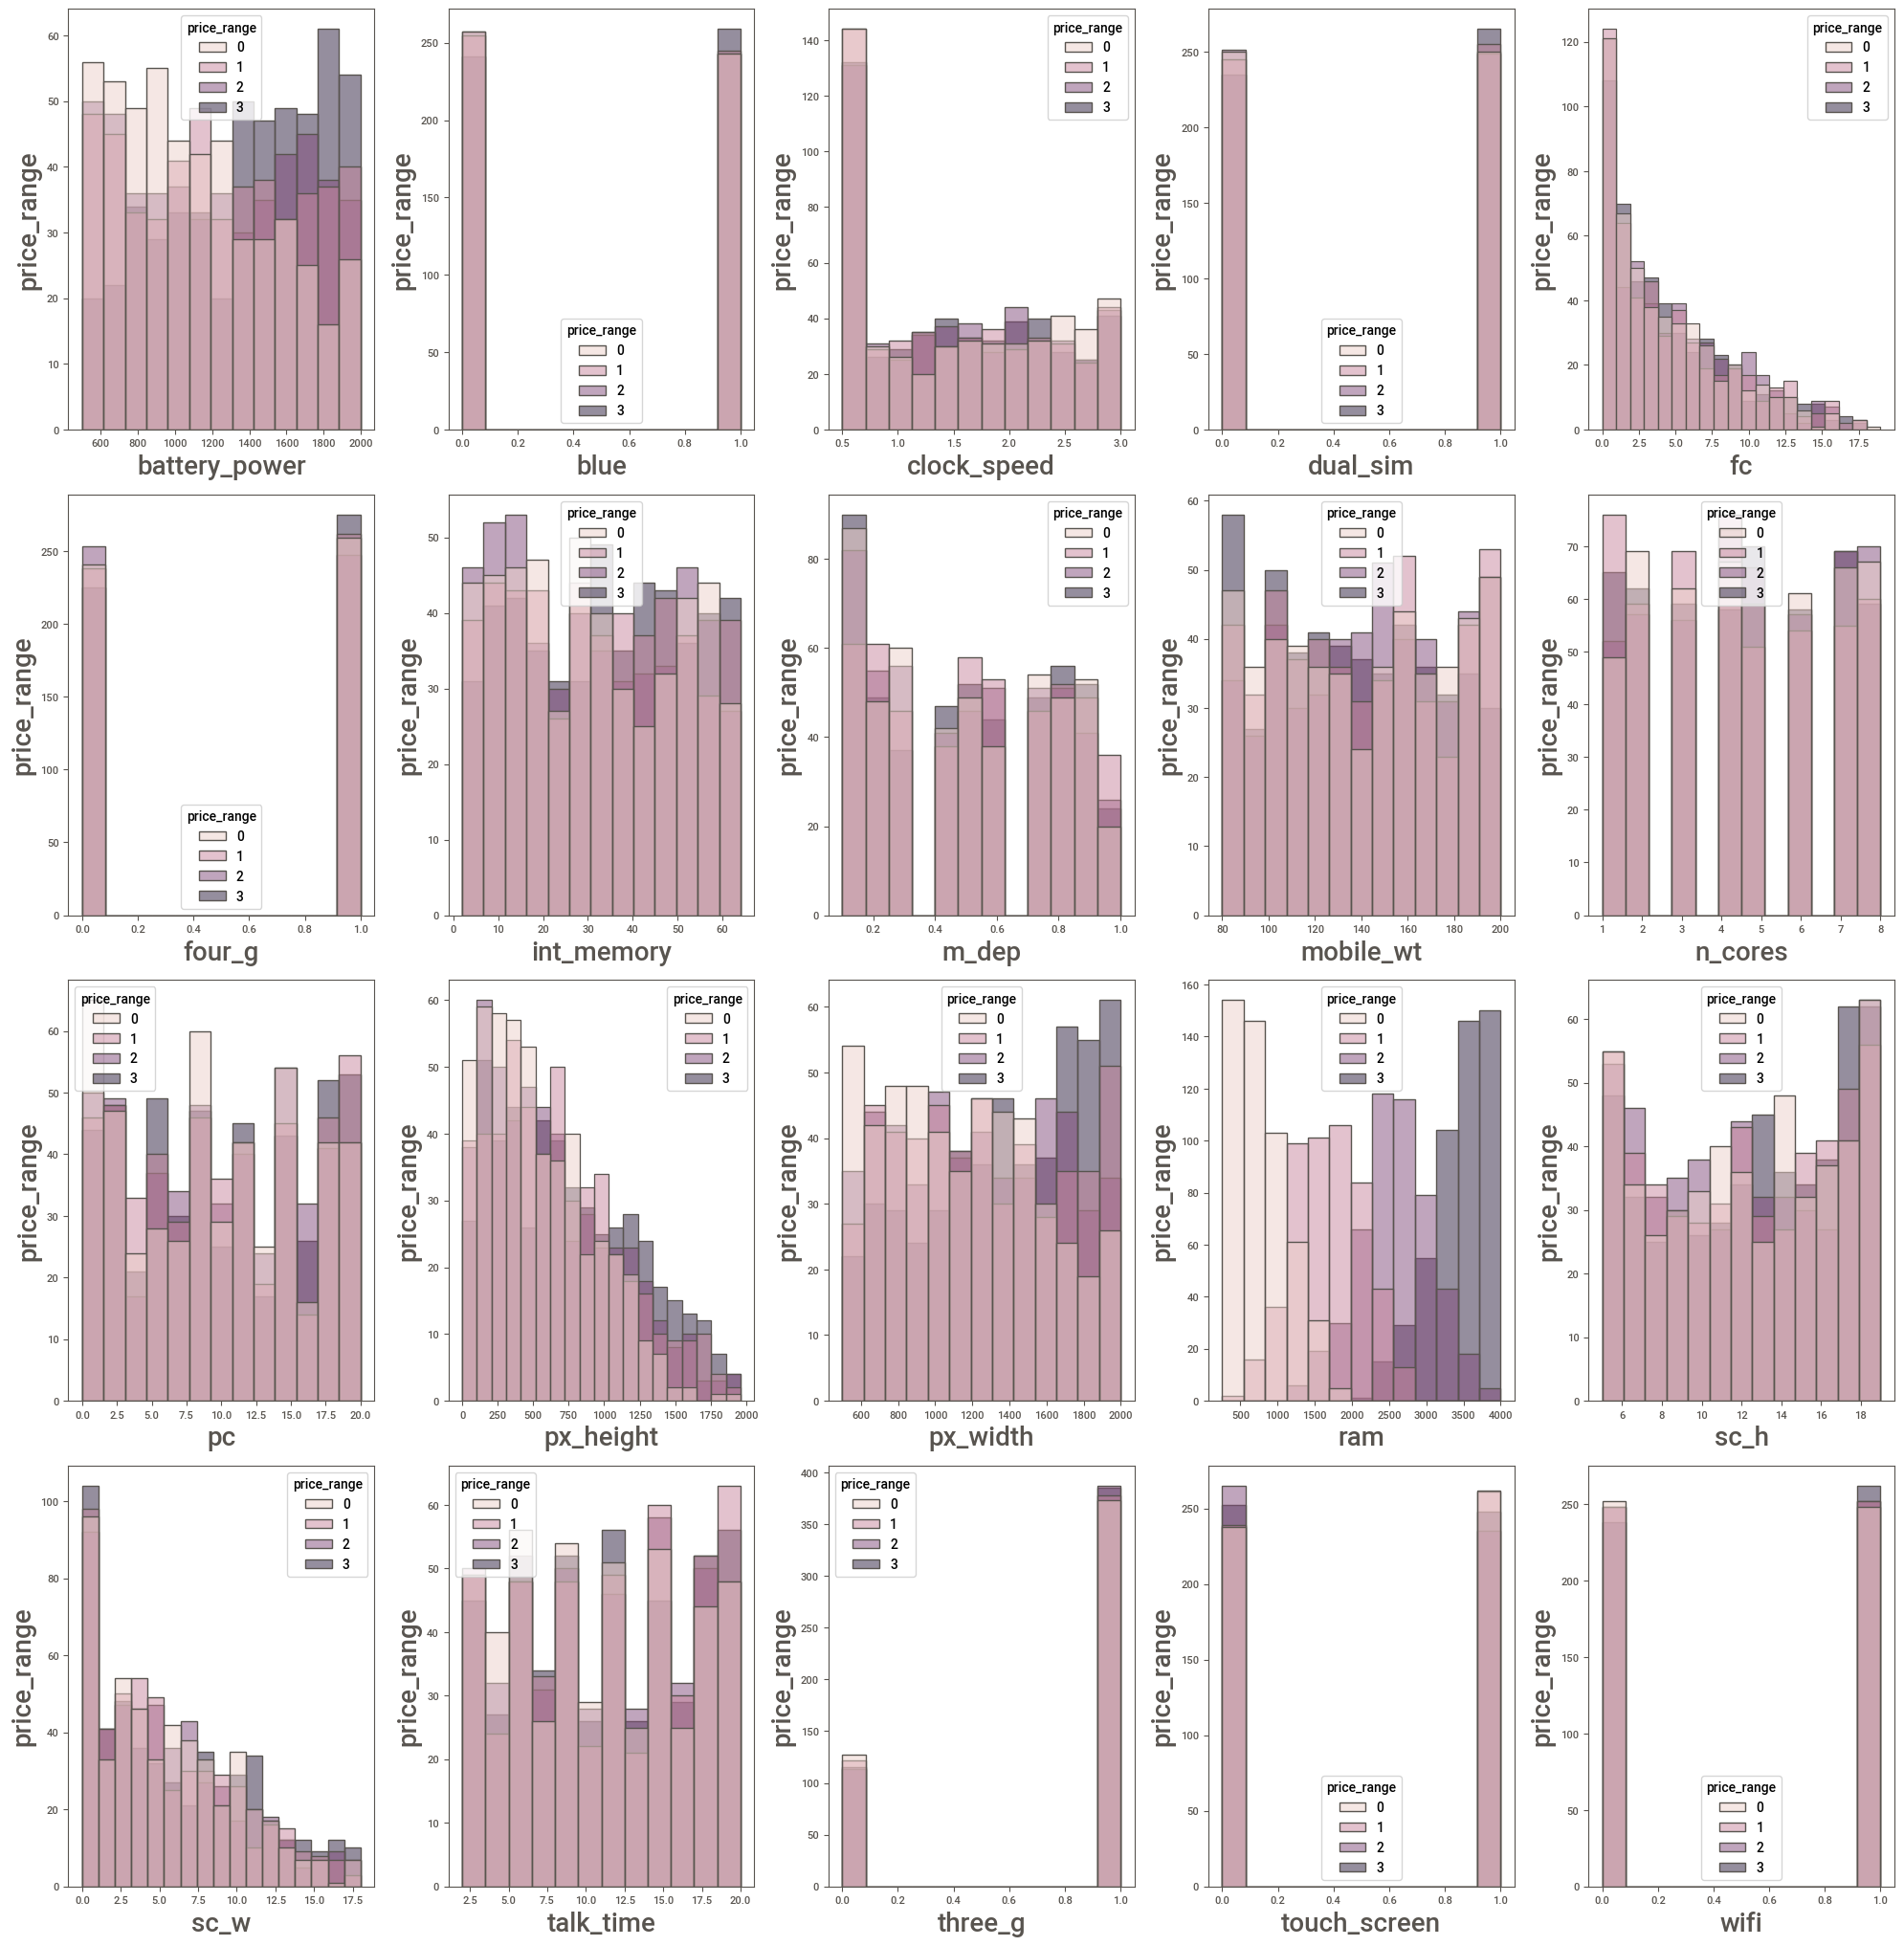

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=20 :
        ax = plt.subplot(5,5,plotnumber)
        sns.histplot(x=data[column].dropna(axis=0)
                        ,hue=data.price_range)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('price_range',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

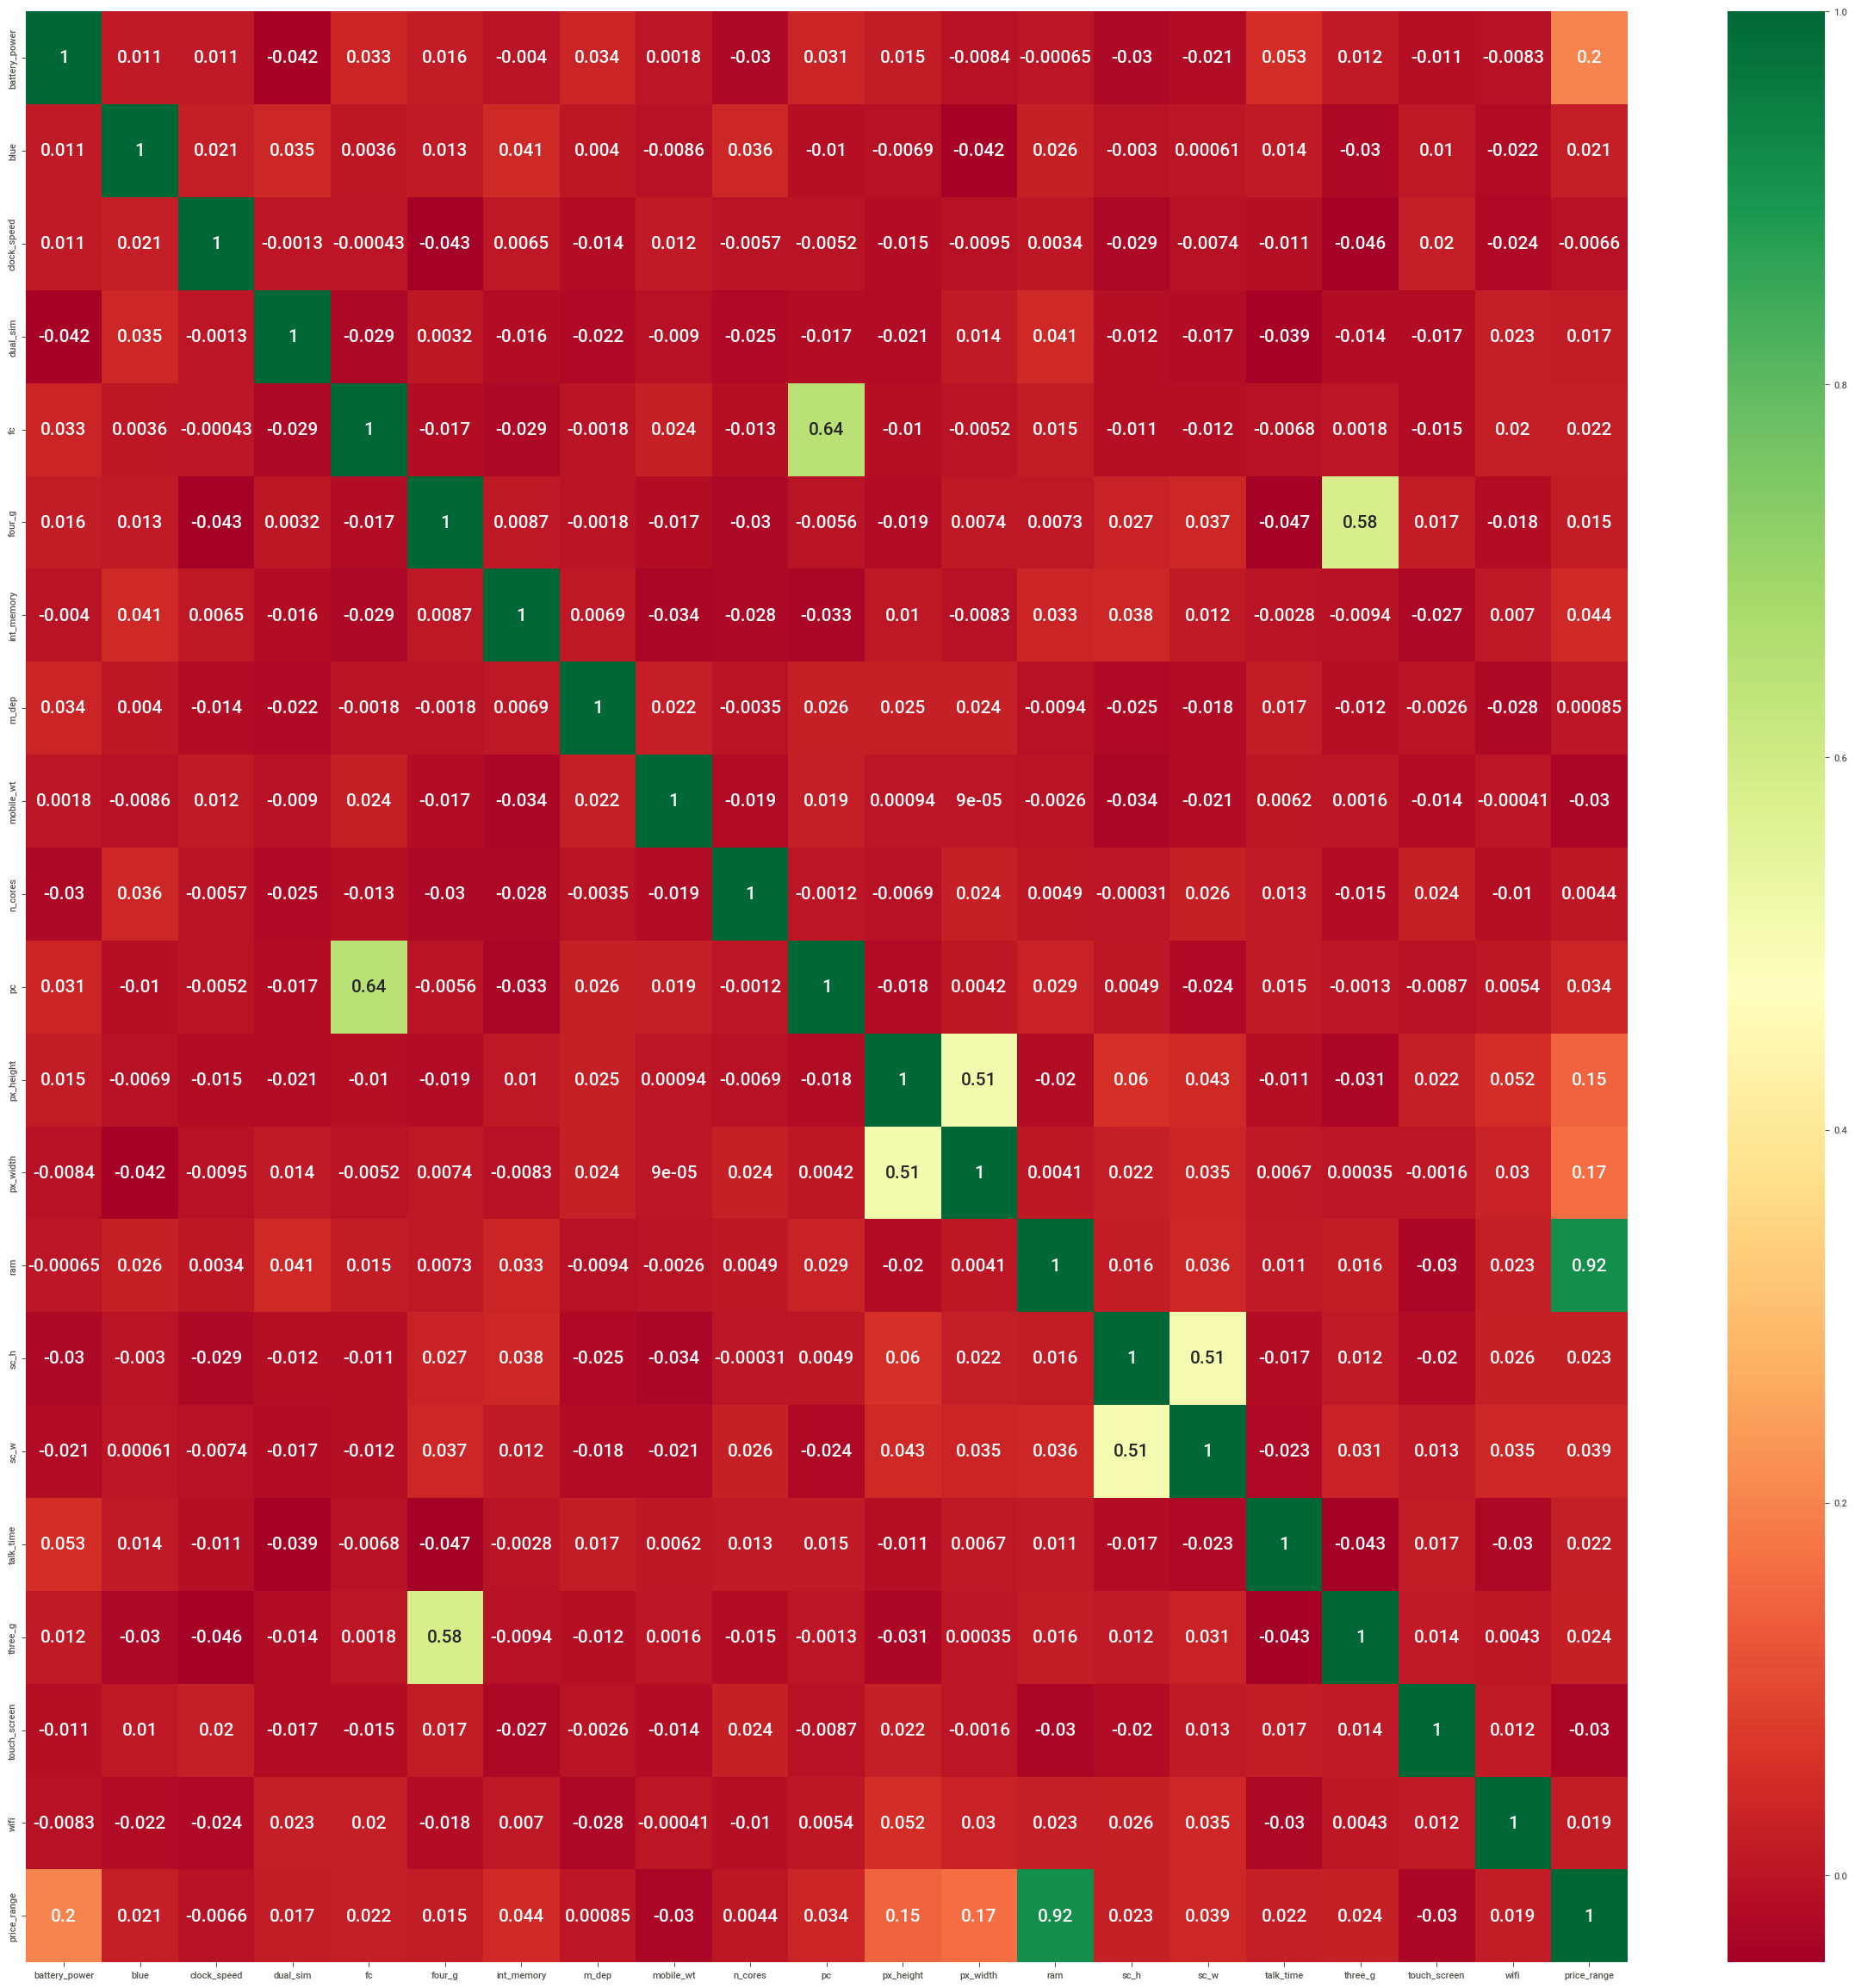

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [ ]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
X = data.drop('price_range', axis=1)
y = data.price_range

In [ ]:
data.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')
dt.fit(X_train,y_train)
y_hat=dt.predict(X_test)
y_hat

array([0, 2, 1, 3, 1, 2, 2, 1, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 3, 0, 1, 1, 3, 0, 3, 0, 2, 3, 1, 0,
       3, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 1, 2, 3, 0, 1, 3, 0, 0, 3, 2, 2, 3, 2, 1, 0, 2, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 2, 0, 0, 1, 0, 0, 3, 3, 0, 1, 1,
       0, 0, 3, 1, 2, 2, 2, 3, 0, 2, 1, 3, 2, 1, 3, 3, 1, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 2, 1, 1, 2, 3, 0, 3, 3, 0, 0, 0, 2, 2, 2, 3, 2, 1, 0,
       2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       2, 2, 1, 1, 0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 1, 3, 2, 2, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 3, 0, 0, 0, 2, 1, 2, 3, 1, 0, 3, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 1, 1, 2, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       3, 1, 3, 0, 2, 3, 2, 3, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 2, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

y_train_predict=dt.predict(X_train)
acc_train=accuracy_score(y_train,y_train_predict)
acc_train

0.8586666666666667

In [ ]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       368
           1       0.77      0.81      0.79       382
           2       0.77      0.80      0.78       380
           3       0.93      0.94      0.93       370

    accuracy                           0.86      1500
   macro avg       0.87      0.86      0.86      1500
weighted avg       0.86      0.86      0.86      1500



In [ ]:
pd.crosstab(y_train,y_train_predict)

col_0,0,1,2,3
price_range,,,,
0,328,40,0,0
1,3,311,68,0
2,0,51,303,26
3,0,1,23,346


In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       132
           1       0.70      0.77      0.73       118
           2       0.68      0.69      0.69       120
           3       0.84      0.88      0.86       130

    accuracy                           0.79       500
   macro avg       0.80      0.79      0.79       500
weighted avg       0.80      0.79      0.80       500



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [ ]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
tree_cv.best_score_

nan

In [ ]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf= 4,min_samples_split=2,splitter='random')

In [ ]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, splitter='random')

In [ ]:
y_p_tr=dt1.predict(X_train)

In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       132
           1       0.70      0.77      0.73       118
           2       0.68      0.69      0.69       120
           3       0.84      0.88      0.86       130

    accuracy                           0.79       500
   macro avg       0.80      0.79      0.79       500
weighted avg       0.80      0.79      0.80       500



In [ ]:
y_hat1=dt1.predict(X_test)

In [ ]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       132
           1       0.76      0.82      0.79       118
           2       0.73      0.78      0.75       120
           3       0.92      0.78      0.84       130

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.83      0.82      0.82       500



[Text(0.2988006161971831, 0.95, 'X[13] <= 478.251\ngini = 0.75\nsamples = 1500\nvalue = [368, 382, 380, 370]'),
 Text(0.15955105633802816, 0.85, 'X[12] <= 1835.44\ngini = 0.041\nsamples = 95\nvalue = [93, 2, 0, 0]'),
 Text(0.1525088028169014, 0.75, 'gini = 0.0\nsamples = 88\nvalue = [88, 0, 0, 0]'),
 Text(0.16659330985915494, 0.75, 'gini = 0.408\nsamples = 7\nvalue = [5, 2, 0, 0]'),
 Text(0.438050176056338, 0.85, 'X[13] <= 1671.636\ngini = 0.746\nsamples = 1405\nvalue = [275, 380, 380, 370]'),
 Text(0.18067781690140844, 0.75, 'X[0] <= 1158.266\ngini = 0.519\nsamples = 474\nvalue = [271, 185, 18, 0]'),
 Text(0.04929577464788732, 0.65, 'X[13] <= 1036.681\ngini = 0.328\nsamples = 203\nvalue = [161, 42, 0, 0]'),
 Text(0.014084507042253521, 0.55, 'X[11] <= 992.488\ngini = 0.043\nsamples = 91\nvalue = [89, 2, 0, 0]'),
 Text(0.007042253521126761, 0.45, 'gini = 0.0\nsamples = 70\nvalue = [70, 0, 0, 0]'),
 Text(0.02112676056338028, 0.45, 'X[11] <= 1511.788\ngini = 0.172\nsamples = 21\nvalue = [

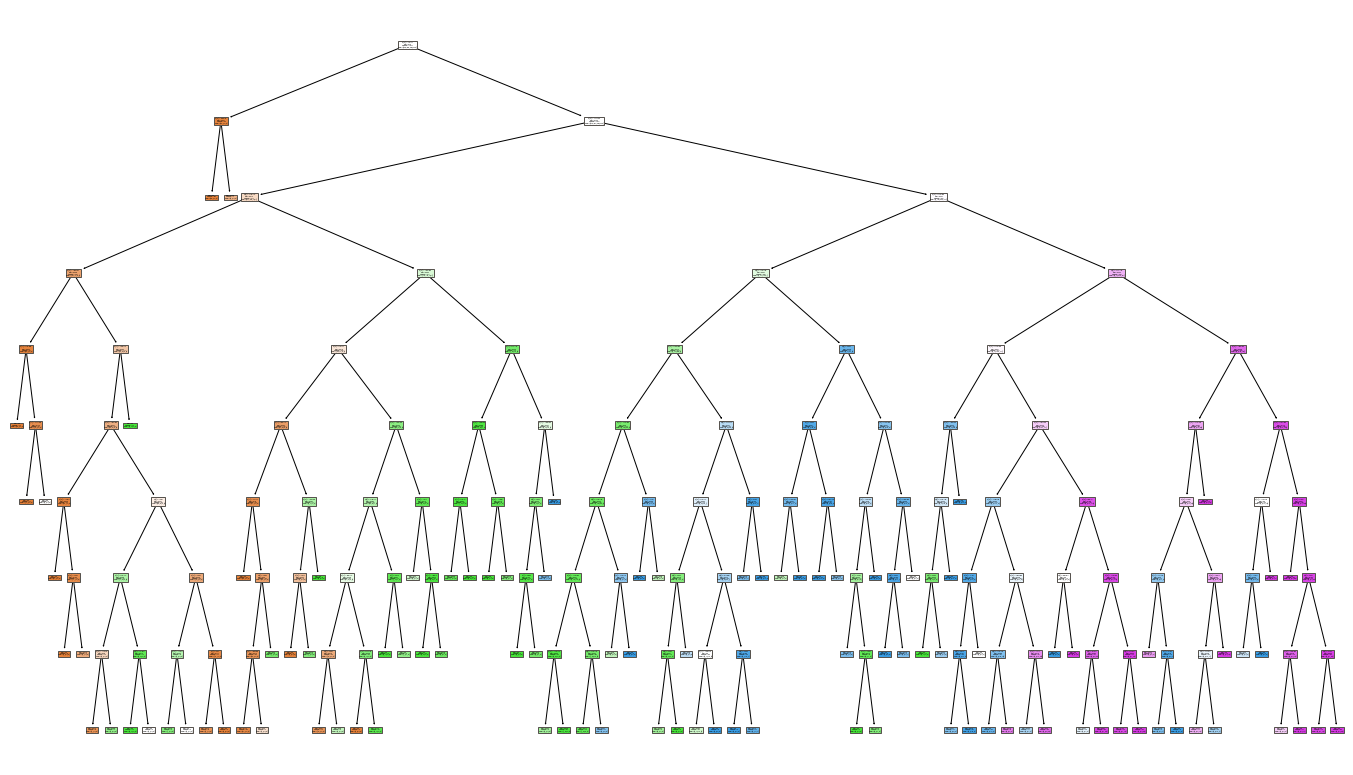

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree

plt.figure(figsize=(24,14))
plot_tree(dt1, filled=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_predict=rf_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       132
           1       0.83      0.88      0.85       118
           2       0.81      0.80      0.81       120
           3       0.91      0.89      0.90       130

    accuracy                           0.88       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.88      0.88      0.88       500



In [ ]:
data.head(50)

# Report
when I working on this I use many algorithem's.I get my pricision value in Decision Tree algprithem
first I analysize All the features,and I started basic checks that time got knowledge about features values
and i go to the next step Exploratory Data Analysis I got outliers in the front camera megapixel domain then
I check correlation by heatmap then goes to Test and Train model Then fit the model
1)My model show's the accuracy score 0.86 and phone price value show's that low cost the 0 is got 0.99 precision value
2)My model show's the accuracy score 0.88 In RandomForestclassifier and phone price value show's that low cost the 0 is got 0.95 precision value
  medium cost 1 is got 0.83 and i got very high cost 3 is 0.91
So I recommended RandomForestclassifier in this i got good accurancy score